# Debugging
So far the network seem to have hard times learning. In this notbook I am going over [this](https://stackoverflow.com/questions/41488279/neural-network-always-predicts-the-same-class) tutorial for debugging a neural network.

## Fitting one item datasets

In [2]:
import pandas as pd
metadata_sample = pd.read_csv('../data/combined_data/metadata_sample_for_testing.csv',index_col=0)
metadata_sample[metadata_sample['DM'] == 0].reset_index(drop=True).to_csv('../data/combined_data/metadata_sample_for_testing_0.csv')
metadata_sample[metadata_sample['DM'] == 1].reset_index(drop=True).to_csv('../data/combined_data/metadata_sample_for_testing_1.csv')


# Fit class 0 - works


*************************
* Experiment ['0', '1'] *
*************************
Configurations:
{'seed': 123, 'metadata_file_path': './data/combined_data/metadata_sample_for_testing_0.csv', 'data_folder_path': './data/individual-signals/', 'fillna': 0, 'batch_size': 32, 'n_epochs': 30, 'targets': ['DM'], 'input_dimension': 12, 'hidden_dimmension': 32, 'attention_heads': 4, 'encoder_number_of_layers': 4, 'dropout': 0.4, 'clip': 1, 'positional_encodings': False, 'saving_path': './models/exp1'}

Starting Experiment


training using device: mps


32 4


/opt/homebrew/Caskroom/miniforge/base/envs/torch-gpu/lib/python3.8/site-packages/torch/nn/modules/transformer.py:218: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because  self.layers[0].self_attn.batch_first was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


The model has 160,584 trainable parameters
TransformerEncoderDownstream(
  (project_input): Linear(in_features=12, out_features=32, bias=True)
  (encoder): Linear(in_features=12, out_features=32, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.4, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
        )
        (linear1): Linear(in_features=32, out_features=512, bias=True)
        (dropout): Dropout(p=0.4, inplace=False)
        (linear2): Linear(in_features=512, out_features=32, bias=True)
        (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.4, inplace=False)
        (dropout2): Dropout(p=0.4, inplace=False)
      )
    )


Within epoch loss (validation) 8e-05: 100%|██████████| 140/140 [00:17<00:00,  8.17it/s]


First 5 examples:
[0. 0. 0. 0. 0.] [7.87205427e-05 7.63464341e-05 7.70805127e-05 7.73549546e-05
 7.70539191e-05]
Lengths 4480 4480


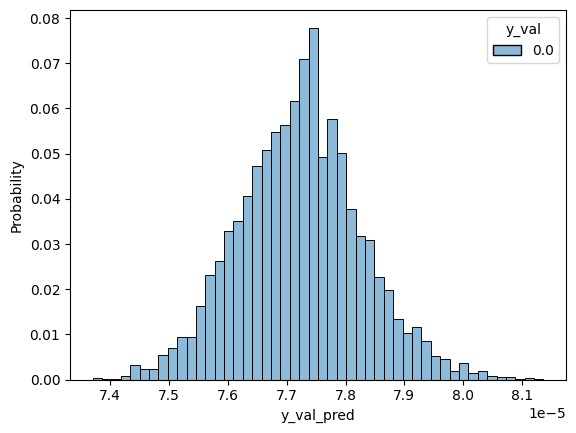

---------------------------------------------
Epoch: 01 | Time: 5m 9s
	Train Loss: 0.002
	 Val. Loss: 0.000
	 Best Val. Loss: 0.000
---------------------------------------------


Within epoch loss (training) 6e-05:  10%|▉         | 67/703 [00:27<04:21,  2.43it/s]


KeyboardInterrupt: 

In [4]:
import os
import re
import yaml

# make sure we're in the correct directory
os.chdir('/Users/davidharar/Documents/School/thesis/downstream_classification')

# import trainer
from executors.train_on_local_machine_mps import trainer

# import yaml file. Later, loop over configs
config_file_name = 'tests/0.1.DM-positive-class.yml'

with open('./configs/'+config_file_name,'r') as f:
    config = yaml.safe_load(f)['config']

experiment_ind = re.findall(r'\d+', config_file_name)
print(len(f'* Experiment {experiment_ind} *')*'*')
print(f'* Experiment {experiment_ind} *')
print(len(f'* Experiment {experiment_ind} *')*'*')
print('Configurations:')
print(config)
print('')
# run
print('Starting Experiment')
trainer(**config)


# Fit class 1 - worked

/opt/homebrew/Caskroom/miniforge/base/envs/torch-gpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/Caskroom/miniforge/base/envs/torch-gpu/lib/python3.8/site-packages/torch/nn/modules/transformer.py:218: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because  self.layers[0].self_attn.batch_first was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


*************************
* Experiment ['0', '1'] *
*************************
Configurations:
{'seed': 123, 'metadata_file_path': './data/combined_data/metadata_sample_for_testing_1.csv', 'data_folder_path': './data/individual-signals/', 'fillna': 0, 'batch_size': 32, 'n_epochs': 30, 'targets': ['DM'], 'input_dimension': 12, 'hidden_dimmension': 32, 'attention_heads': 4, 'encoder_number_of_layers': 4, 'dropout': 0.4, 'clip': 1, 'positional_encodings': False, 'saving_path': './models/exp1'}

Starting Experiment


training using device: mps


32 4
The model has 160,584 trainable parameters
TransformerEncoderDownstream(
  (project_input): Linear(in_features=12, out_features=32, bias=True)
  (encoder): Linear(in_features=12, out_features=32, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.4, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
 

Within epoch loss (validation) 0.0: 100%|██████████| 25/25 [00:03<00:00,  7.81it/s]


First 5 examples:
[1. 1. 1. 1. 1.] [1. 1. 1. 1. 1.]
Lengths 800 800


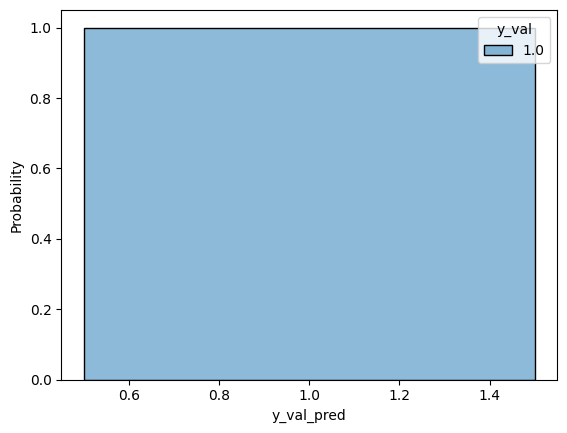

---------------------------------------------
Epoch: 01 | Time: 0m 56s
	Train Loss: 0.011
	 Val. Loss: 0.000
	 Best Val. Loss: 0.000
---------------------------------------------


Within epoch loss (training) 0.0:  28%|██▊       | 35/126 [00:14<00:38,  2.38it/s]


KeyboardInterrupt: 

In [1]:
import os
import re
import yaml

# make sure we're in the correct directory
os.chdir('/Users/davidharar/Documents/School/thesis/downstream_classification')

# import trainer
from executors.train_on_local_machine_mps import trainer

# import yaml file. Later, loop over configs
config_file_name = 'tests/0.1.DM-positive-class.yml'

with open('./configs/'+config_file_name,'r') as f:
    config = yaml.safe_load(f)['config']

experiment_ind = re.findall(r'\d+', config_file_name)
print(len(f'* Experiment {experiment_ind} *')*'*')
print(f'* Experiment {experiment_ind} *')
print(len(f'* Experiment {experiment_ind} *')*'*')
print('Configurations:')
print(config)
print('')
# run
print('Starting Experiment')
trainer(**config)


# Increase batch size


/opt/homebrew/Caskroom/miniforge/base/envs/torch-gpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/Caskroom/miniforge/base/envs/torch-gpu/lib/python3.8/site-packages/torch/nn/modules/transformer.py:218: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because  self.layers[0].self_attn.batch_first was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


********************************
* Experiment ['0', '1', '512'] *
********************************
Configurations:
{'seed': 123, 'metadata_file_path': './data/combined_data/metadata_sample_for_testing.csv', 'data_folder_path': './data/individual-signals/', 'fillna': 0, 'batch_size': 128, 'n_epochs': 30, 'targets': ['DM'], 'input_dimension': 12, 'hidden_dimmension': 32, 'attention_heads': 4, 'encoder_number_of_layers': 4, 'dropout': 0.4, 'clip': 1, 'positional_encodings': False, 'saving_path': './models/exp1'}

Starting Experiment


training using device: mps


32 4
The model has 160,584 trainable parameters
TransformerEncoderDownstream(
  (project_input): Linear(in_features=12, out_features=32, bias=True)
  (encoder): Linear(in_features=12, out_features=32, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.4, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): M

Within epoch loss (validation) 0.43107: 100%|██████████| 41/41 [00:18<00:00,  2.21it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.1624174  0.16291858 0.16395348 0.1639424  0.16177955]
Lengths 5248 5248


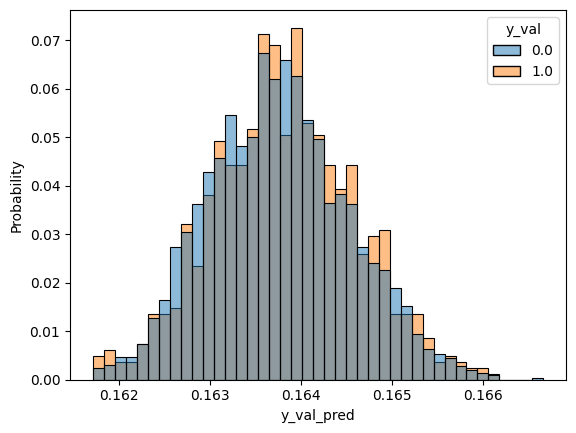

---------------------------------------------
Epoch: 01 | Time: 6m 4s
	Train Loss: 0.438
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.44074: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.10814528 0.10842509 0.10844649 0.10842536 0.10766871]
Lengths 5248 5248


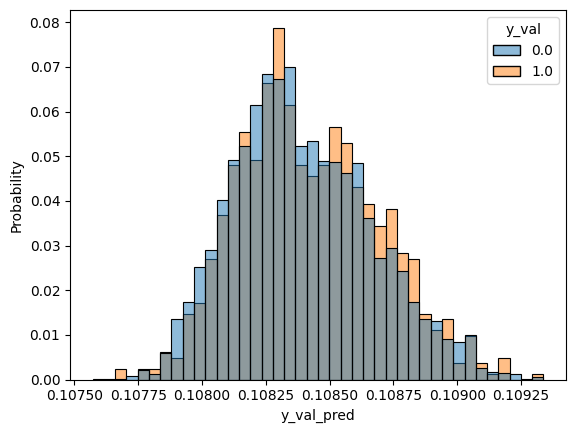

---------------------------------------------
Epoch: 02 | Time: 6m 9s
	Train Loss: 0.431
	 Val. Loss: 0.441
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43112: 100%|██████████| 41/41 [00:18<00:00,  2.21it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.16396204 0.16406682 0.16399893 0.16374959 0.16382548]
Lengths 5248 5248


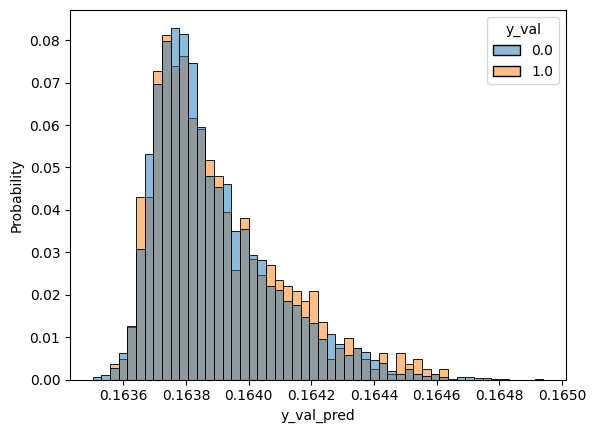

---------------------------------------------
Epoch: 03 | Time: 6m 6s
	Train Loss: 0.428
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43734: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.11649726 0.11647739 0.11645558 0.11651956 0.11646473]
Lengths 5248 5248


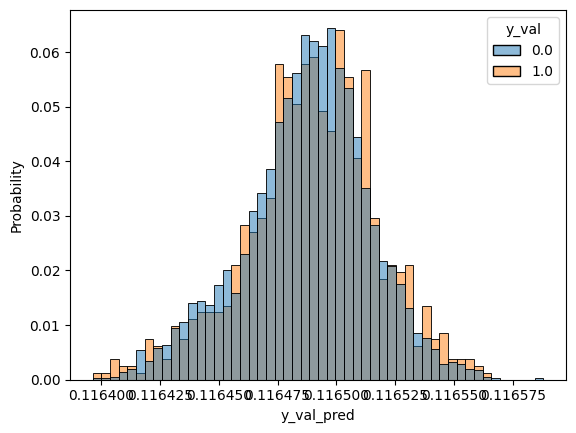

---------------------------------------------
Epoch: 04 | Time: 6m 30s
	Train Loss: 0.432
	 Val. Loss: 0.437
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.44181: 100%|██████████| 41/41 [00:21<00:00,  1.94it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.10629985 0.10629728 0.10629002 0.10631072 0.10630565]
Lengths 5248 5248


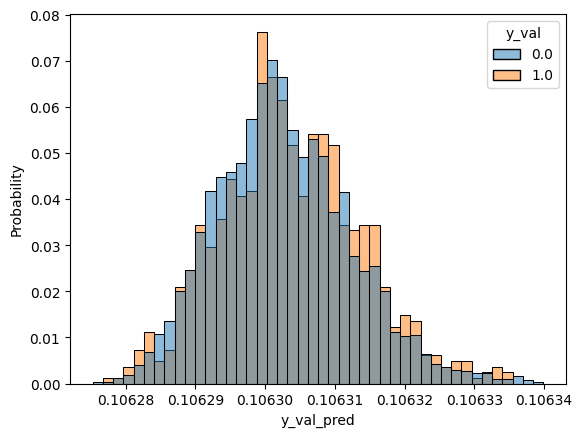

---------------------------------------------
Epoch: 05 | Time: 7m 8s
	Train Loss: 0.430
	 Val. Loss: 0.442
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.44352: 100%|██████████| 41/41 [00:21<00:00,  1.94it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.10309512 0.10311253 0.10310901 0.10311179 0.1031112 ]
Lengths 5248 5248


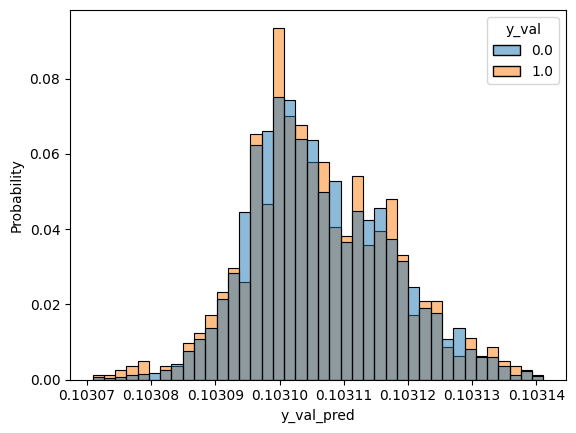

---------------------------------------------
Epoch: 06 | Time: 7m 13s
	Train Loss: 0.430
	 Val. Loss: 0.444
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43137: 100%|██████████| 41/41 [00:21<00:00,  1.93it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.14300954 0.14303496 0.14303835 0.14301755 0.14303167]
Lengths 5248 5248


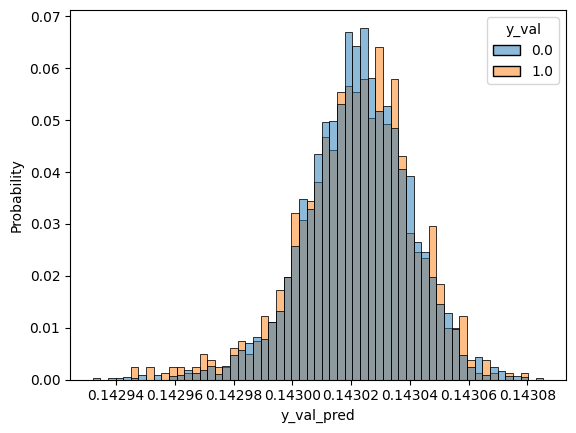

---------------------------------------------
Epoch: 07 | Time: 7m 18s
	Train Loss: 0.429
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43136: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]


First 5 examples:
[0. 1. 1. 0. 1.] [0.1429968  0.1430396  0.14305601 0.14303261 0.14303069]
Lengths 5248 5248


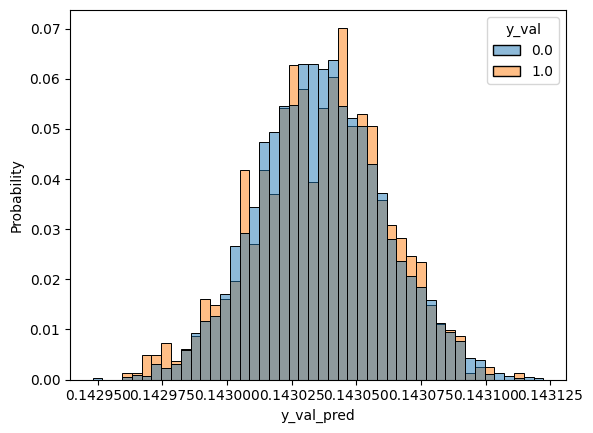

---------------------------------------------
Epoch: 08 | Time: 7m 19s
	Train Loss: 0.428
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43083: 100%|██████████| 41/41 [00:21<00:00,  1.93it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15636425 0.15639432 0.15640537 0.15639687 0.1563825 ]
Lengths 5248 5248


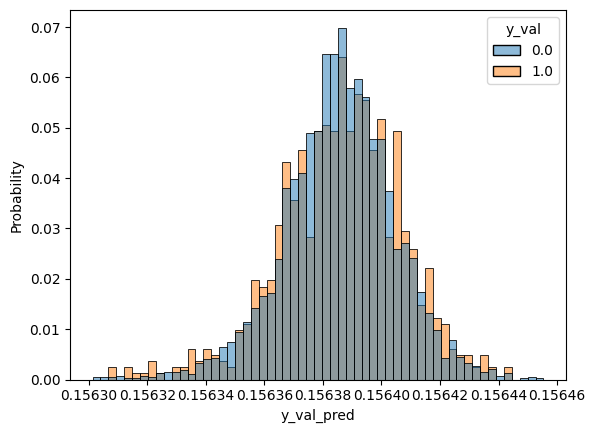

---------------------------------------------
Epoch: 09 | Time: 7m 18s
	Train Loss: 0.428
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43082: 100%|██████████| 41/41 [00:21<00:00,  1.94it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.1556071  0.1556268  0.15561318 0.15561567 0.15562753]
Lengths 5248 5248


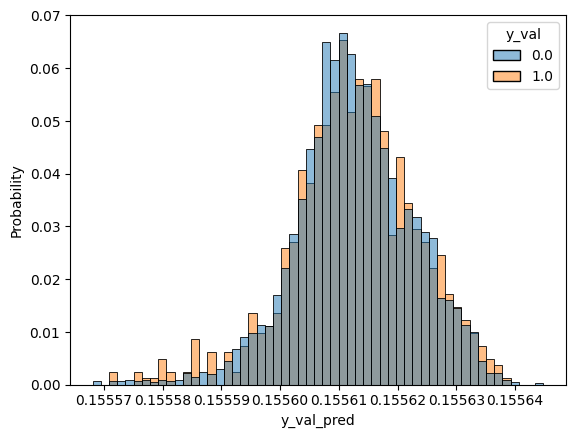

---------------------------------------------
Epoch: 10 | Time: 7m 16s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43083: 100%|██████████| 41/41 [00:21<00:00,  1.91it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15331845 0.15332375 0.15332322 0.15332428 0.15332179]
Lengths 5248 5248


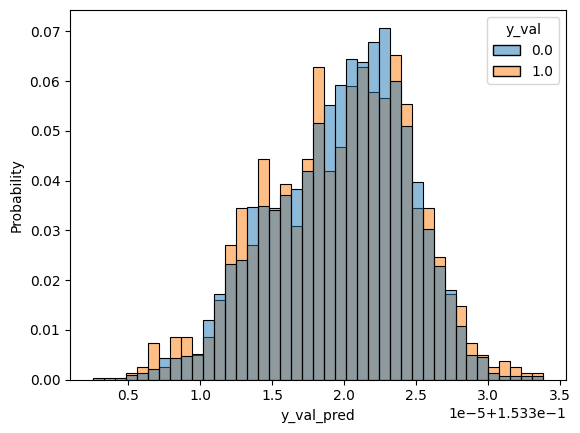

---------------------------------------------
Epoch: 11 | Time: 7m 17s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15242445 0.15242502 0.15242524 0.15242638 0.15242583]
Lengths 5248 5248


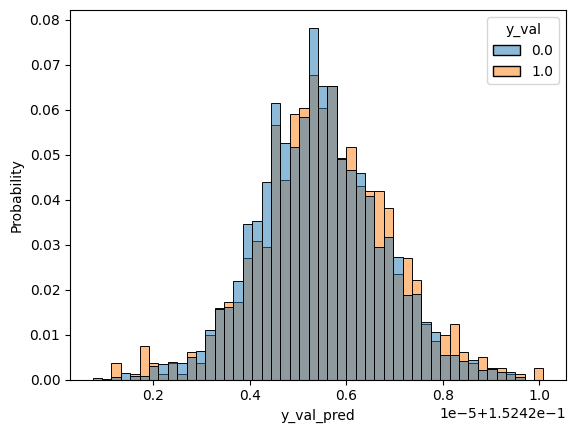

---------------------------------------------
Epoch: 12 | Time: 7m 17s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:22<00:00,  1.85it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15214841 0.15214875 0.15214847 0.15214835 0.15214902]
Lengths 5248 5248


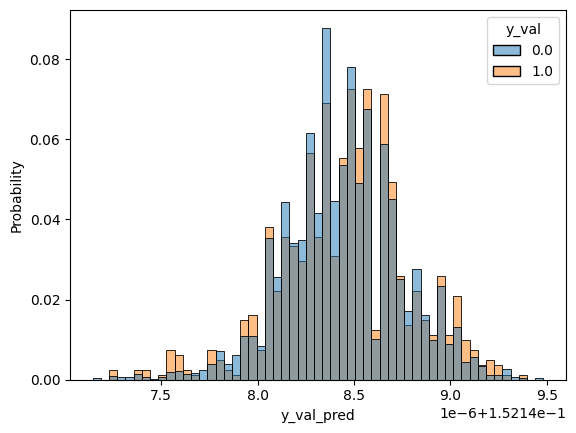

---------------------------------------------
Epoch: 13 | Time: 7m 21s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43085: 100%|██████████| 41/41 [00:21<00:00,  1.88it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15209076 0.1520908  0.15209077 0.15209068 0.15209076]
Lengths 5248 5248


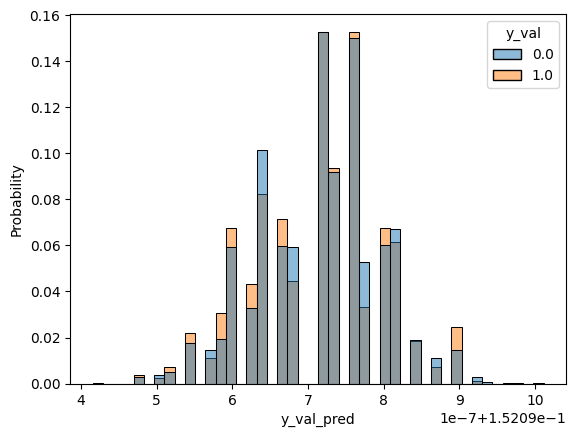

---------------------------------------------
Epoch: 14 | Time: 7m 20s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43085: 100%|██████████| 41/41 [00:21<00:00,  1.92it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15210438 0.15210439 0.15210432 0.15210433 0.15210432]
Lengths 5248 5248


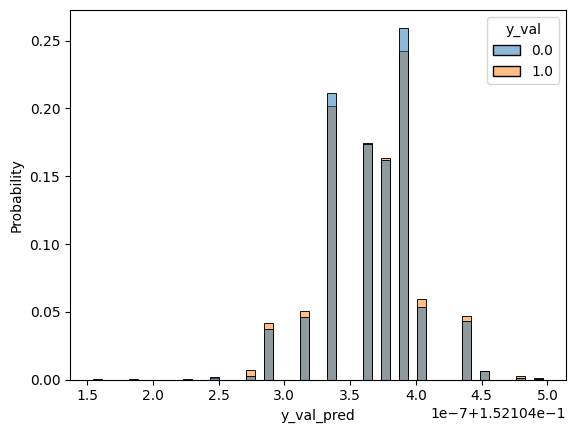

---------------------------------------------
Epoch: 15 | Time: 7m 19s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43085: 100%|██████████| 41/41 [00:21<00:00,  1.91it/s]


First 5 examples:
[0. 1. 1. 0. 1.] [0.15213934 0.15213948 0.15213935 0.15213932 0.15213932]
Lengths 5248 5248


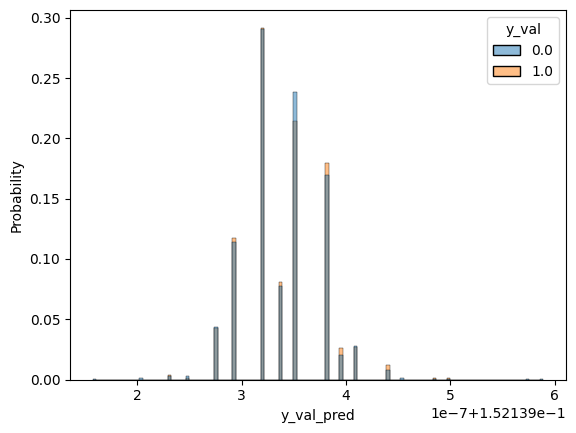

---------------------------------------------
Epoch: 16 | Time: 7m 20s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:21<00:00,  1.94it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15217435 0.15217435 0.15217435 0.15217435 0.15217435]
Lengths 5248 5248


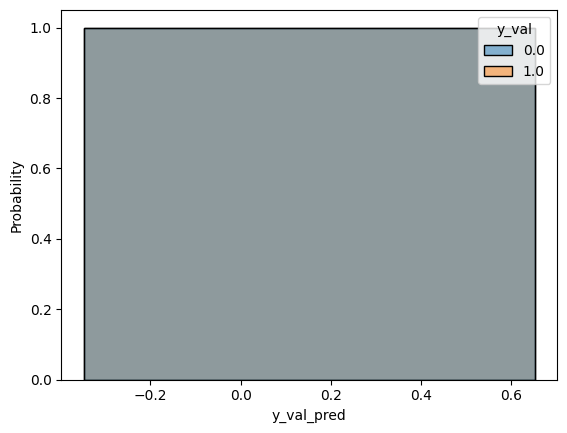

---------------------------------------------
Epoch: 17 | Time: 7m 20s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:21<00:00,  1.88it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15221421 0.15221421 0.15221421 0.15221421 0.15221421]
Lengths 5248 5248


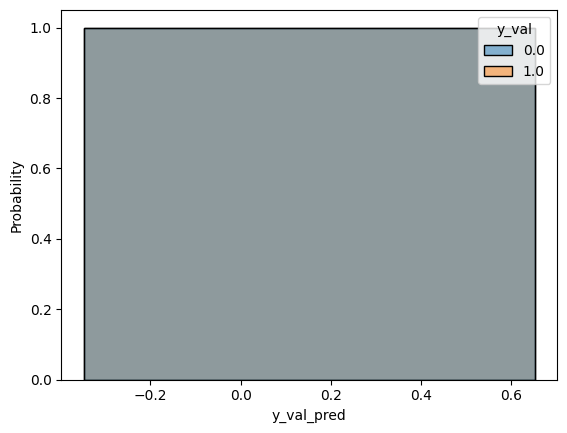

---------------------------------------------
Epoch: 18 | Time: 7m 23s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:22<00:00,  1.86it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.1522525 0.1522525 0.1522525 0.1522525 0.1522525]
Lengths 5248 5248


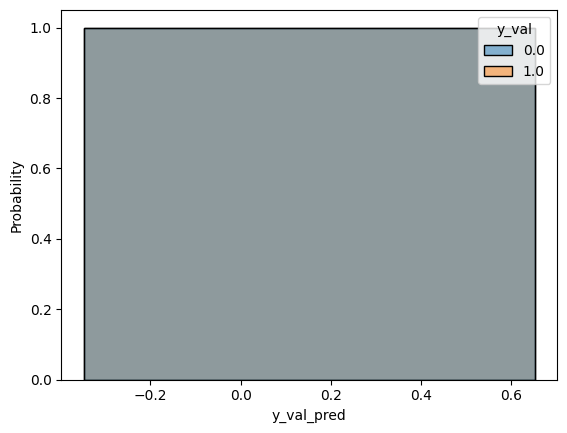

---------------------------------------------
Epoch: 19 | Time: 7m 27s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:21<00:00,  1.94it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15228699 0.15228699 0.15228699 0.15228699 0.15228699]
Lengths 5248 5248


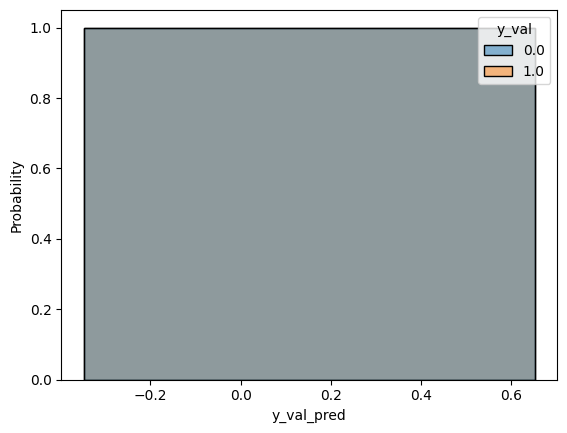

---------------------------------------------
Epoch: 20 | Time: 7m 26s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:21<00:00,  1.93it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15230379 0.15230379 0.15230379 0.15230379 0.15230379]
Lengths 5248 5248


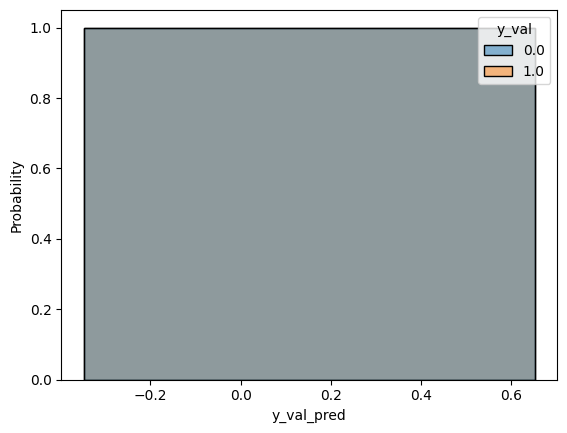

---------------------------------------------
Epoch: 21 | Time: 7m 22s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:22<00:00,  1.86it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.1523259 0.1523259 0.1523259 0.1523259 0.1523259]
Lengths 5248 5248


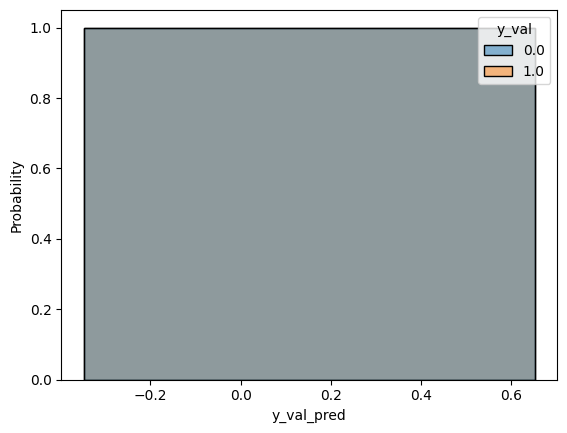

---------------------------------------------
Epoch: 22 | Time: 7m 27s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:21<00:00,  1.95it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15232693 0.15232693 0.15232693 0.15232693 0.15232693]
Lengths 5248 5248


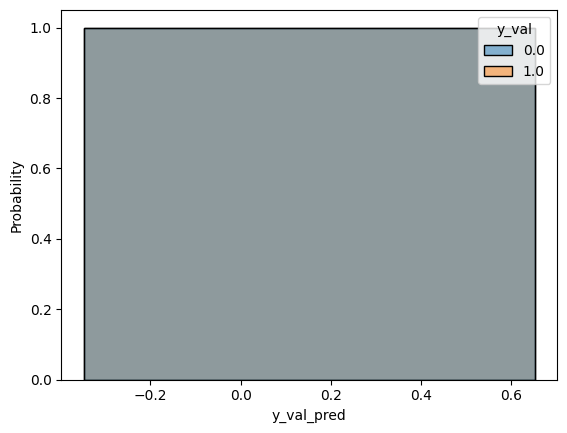

---------------------------------------------
Epoch: 23 | Time: 7m 25s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:21<00:00,  1.94it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15233155 0.15233155 0.15233155 0.15233155 0.15233155]
Lengths 5248 5248


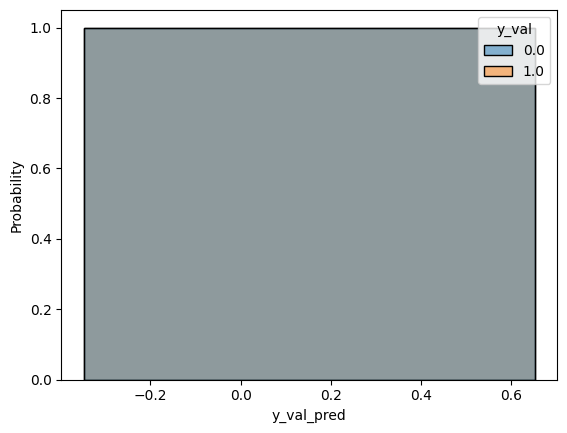

---------------------------------------------
Epoch: 24 | Time: 7m 20s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:21<00:00,  1.89it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15233801 0.15233801 0.15233801 0.15233801 0.15233801]
Lengths 5248 5248


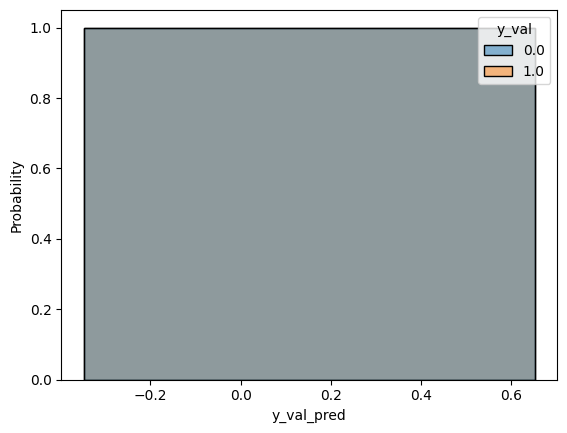

---------------------------------------------
Epoch: 25 | Time: 7m 24s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:21<00:00,  1.86it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15232421 0.15232421 0.15232421 0.15232421 0.15232421]
Lengths 5248 5248


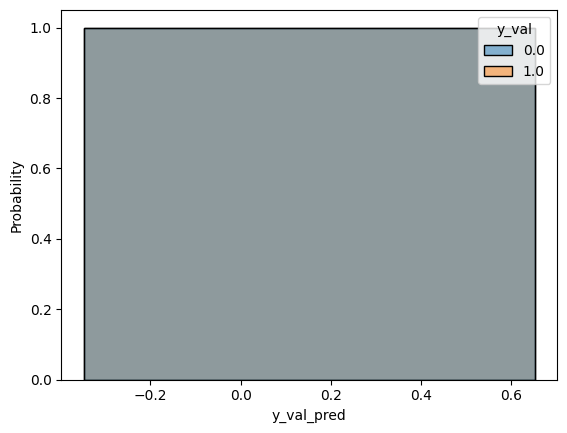

---------------------------------------------
Epoch: 26 | Time: 7m 27s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:21<00:00,  1.92it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15232182 0.15232182 0.15232182 0.15232182 0.15232182]
Lengths 5248 5248


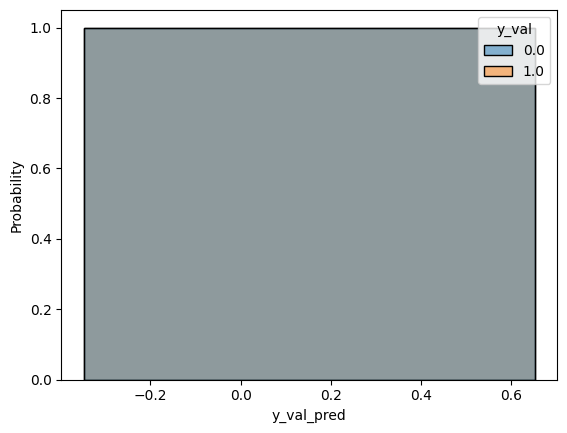

---------------------------------------------
Epoch: 27 | Time: 7m 27s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:20<00:00,  1.96it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15230642 0.15230642 0.15230642 0.15230642 0.15230642]
Lengths 5248 5248


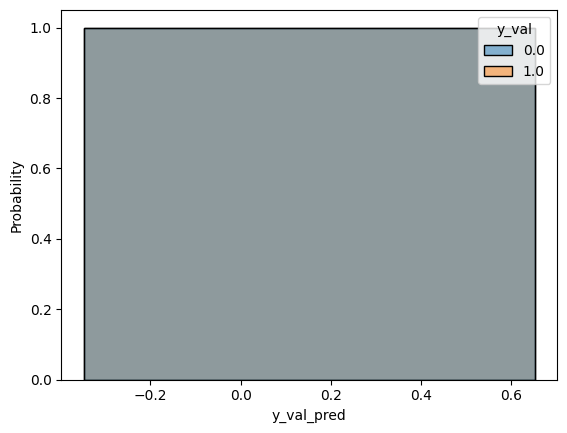

---------------------------------------------
Epoch: 28 | Time: 7m 22s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:21<00:00,  1.92it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15231085 0.15231085 0.15231085 0.15231085 0.15231085]
Lengths 5248 5248


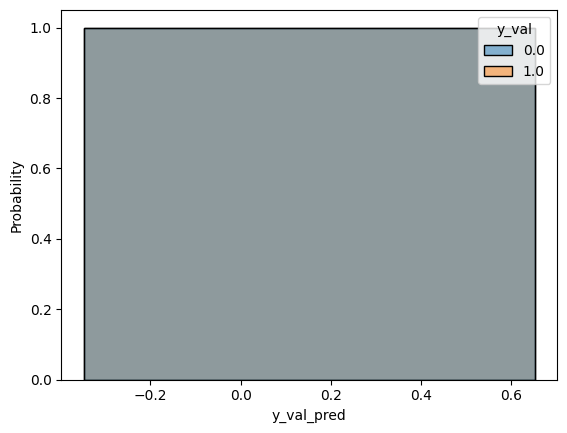

---------------------------------------------
Epoch: 29 | Time: 7m 21s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:21<00:00,  1.94it/s]

First 5 examples:
[0. 1. 1. 0. 1.] [0.15230168 0.15230168 0.15230168 0.15230168 0.15230168]
Lengths 5248 5248


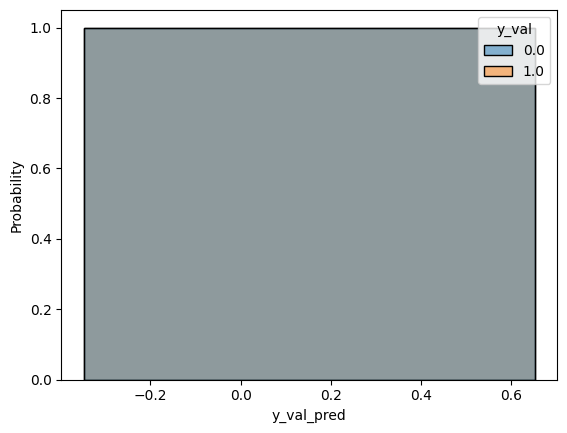

---------------------------------------------
Epoch: 30 | Time: 7m 25s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


In [1]:
import os
import re
import yaml

# make sure we're in the correct directory
os.chdir('/Users/davidharar/Documents/School/thesis/downstream_classification')

# import trainer
from executors.train_on_local_machine_mps import trainer

# import yaml file. Later, loop over configs
config_file_name = 'tests/0.1.DM-batch-size-512.yml'

with open('./configs/'+config_file_name,'r') as f:
    config = yaml.safe_load(f)['config']

experiment_ind = re.findall(r'\d+', config_file_name)
print(len(f'* Experiment {experiment_ind} *')*'*')
print(f'* Experiment {experiment_ind} *')
print(len(f'* Experiment {experiment_ind} *')*'*')
print('Configurations:')
print(config)
print('')
# run
print('Starting Experiment')
trainer(**config)


# Replacing labels

In [5]:
# import pandas as pd
# metadata_sample = pd.read_csv('./data/combined_data/metadata_sample_for_testing-flipped-labels.csv',index_col=0)
# metadata_sample['DM'] = 1-metadata_sample['DM']
# metadata_sample.to_csv('./data/combined_data/metadata_sample_for_testing-flipped-labels.csv')

/opt/homebrew/Caskroom/miniforge/base/envs/torch-gpu/lib/python3.8/site-packages/torch/nn/modules/transformer.py:218: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because  self.layers[0].self_attn.batch_first was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


********************************
* Experiment ['0', '1', '128'] *
********************************
Configurations:
{'seed': 123, 'metadata_file_path': './data/combined_data/metadata_sample_for_testing-flipped-labels.csv', 'data_folder_path': './data/individual-signals/', 'fillna': 0, 'batch_size': 128, 'n_epochs': 30, 'targets': ['DM'], 'input_dimension': 12, 'hidden_dimmension': 32, 'attention_heads': 4, 'encoder_number_of_layers': 4, 'dropout': 0.4, 'clip': 1, 'positional_encodings': False, 'saving_path': './models/exp1'}

Starting Experiment


training using device: mps


32 4
The model has 160,584 trainable parameters
TransformerEncoderDownstream(
  (project_input): Linear(in_features=12, out_features=32, bias=True)
  (encoder): Linear(in_features=12, out_features=32, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.4, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
       

Within epoch loss (validation) 0.43108: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s]


First 5 examples:
[1. 0. 0. 1. 0.] [0.83748162 0.83706212 0.83597612 0.83626205 0.83794385]
Lengths 5248 5248


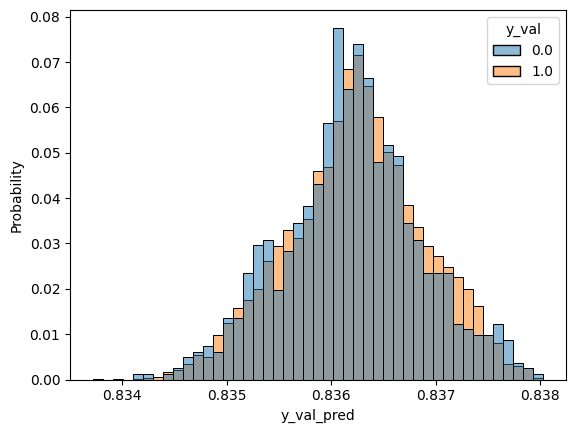

---------------------------------------------
Epoch: 01 | Time: 6m 43s
	Train Loss: 0.439
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.44064: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s]

First 5 examples:
[1. 0. 0. 1. 0.] [0.89154196 0.89133817 0.89135391 0.89126259 0.89184552]
Lengths 5248 5248


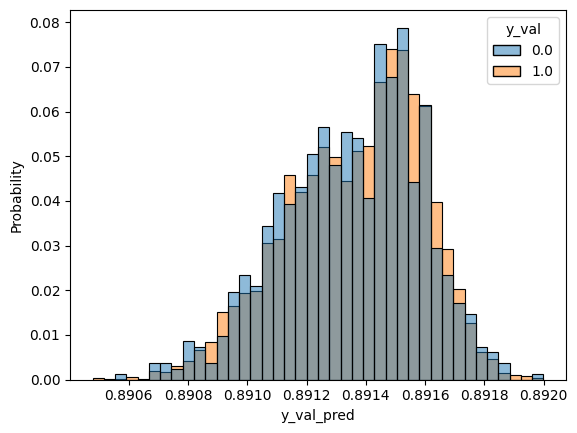

---------------------------------------------
Epoch: 02 | Time: 6m 27s
	Train Loss: 0.431
	 Val. Loss: 0.441
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43134: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s]


First 5 examples:
[1. 0. 0. 1. 0.] [0.83310199 0.83307004 0.83311123 0.83329225 0.83314377]
Lengths 5248 5248


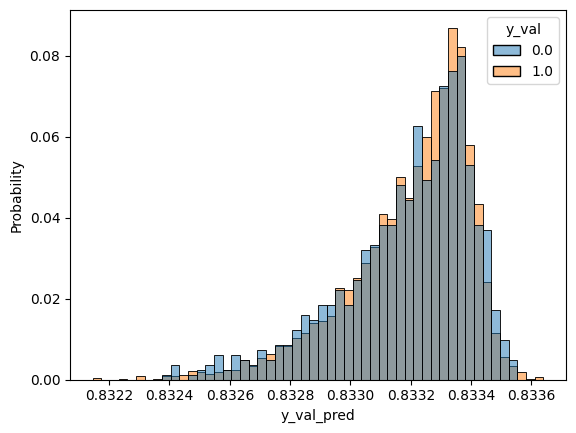

---------------------------------------------
Epoch: 03 | Time: 6m 29s
	Train Loss: 0.428
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43698: 100%|██████████| 41/41 [00:20<00:00,  2.04it/s]


First 5 examples:
[1. 0. 0. 1. 0.] [0.88251585 0.88254029 0.8825531  0.88247901 0.88254166]
Lengths 5248 5248


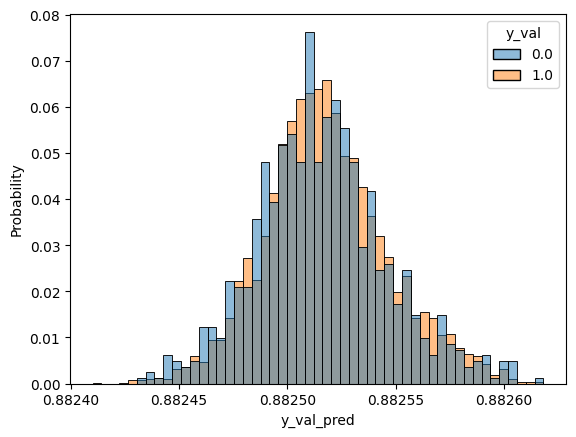

---------------------------------------------
Epoch: 04 | Time: 6m 27s
	Train Loss: 0.432
	 Val. Loss: 0.437
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.44173: 100%|██████████| 41/41 [00:20<00:00,  2.04it/s]

First 5 examples:
[1. 0. 0. 1. 0.] [0.89355218 0.89355564 0.89356142 0.89353937 0.89354533]
Lengths 5248 5248


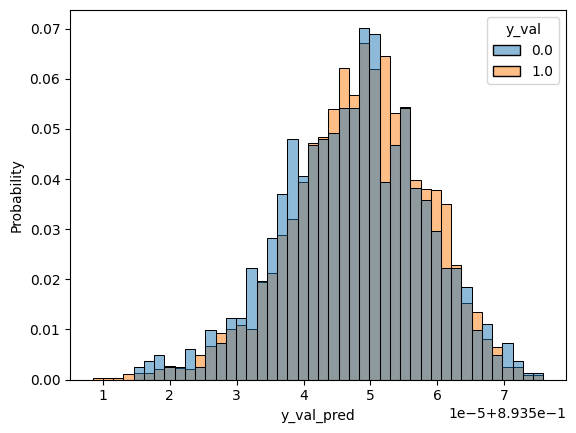

---------------------------------------------
Epoch: 05 | Time: 6m 26s
	Train Loss: 0.430
	 Val. Loss: 0.442
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.44343: 100%|██████████| 41/41 [00:20<00:00,  1.97it/s]


First 5 examples:
[1. 0. 0. 1. 0.] [0.89674652 0.89673167 0.89673394 0.89673567 0.89673042]
Lengths 5248 5248


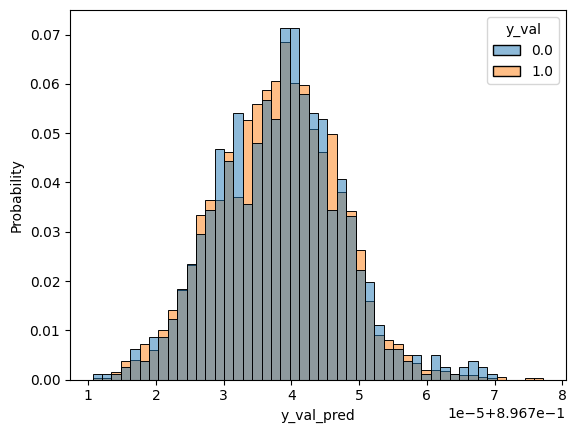

---------------------------------------------
Epoch: 06 | Time: 6m 40s
	Train Loss: 0.430
	 Val. Loss: 0.443
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43138: 100%|██████████| 41/41 [00:19<00:00,  2.08it/s]


First 5 examples:
[1. 0. 0. 1. 0.] [0.85710114 0.8570773  0.85707259 0.85710138 0.85707605]
Lengths 5248 5248


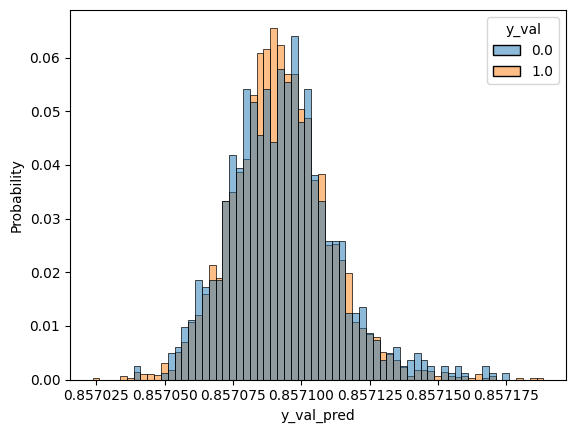

---------------------------------------------
Epoch: 07 | Time: 7m 0s
	Train Loss: 0.429
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43138: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s]

First 5 examples:
[1. 0. 0. 1. 0.] [0.8571775  0.85713595 0.85712188 0.8571521  0.85714173]
Lengths 5248 5248


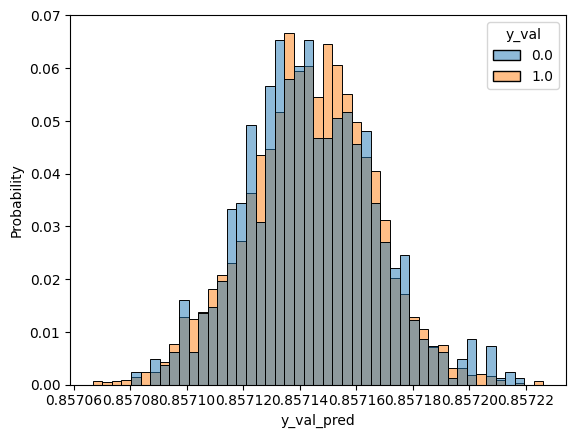

---------------------------------------------
Epoch: 08 | Time: 6m 39s
	Train Loss: 0.428
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43083: 100%|██████████| 41/41 [00:19<00:00,  2.05it/s]


First 5 examples:
[1. 0. 0. 1. 0.] [0.84366828 0.84364289 0.84363395 0.84364897 0.84365201]
Lengths 5248 5248


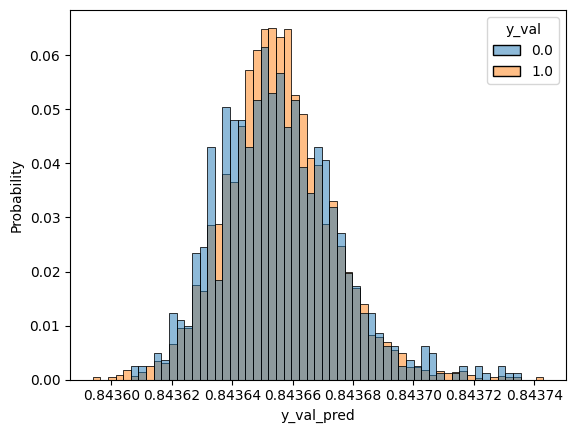

---------------------------------------------
Epoch: 09 | Time: 6m 40s
	Train Loss: 0.428
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43082: 100%|██████████| 41/41 [00:19<00:00,  2.07it/s]

First 5 examples:
[1. 0. 0. 1. 0.] [0.84431893 0.84430099 0.84431356 0.84431124 0.84429938]
Lengths 5248 5248


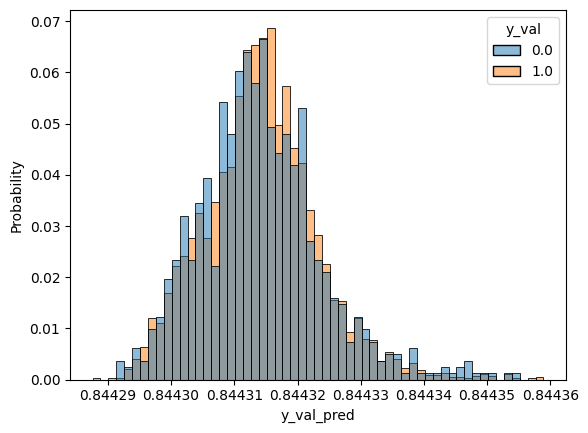

---------------------------------------------
Epoch: 10 | Time: 6m 40s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43083: 100%|██████████| 41/41 [00:20<00:00,  2.04it/s]

First 5 examples:
[1. 0. 0. 1. 0.] [0.84679842 0.84679449 0.84679496 0.84679347 0.84679615]
Lengths 5248 5248


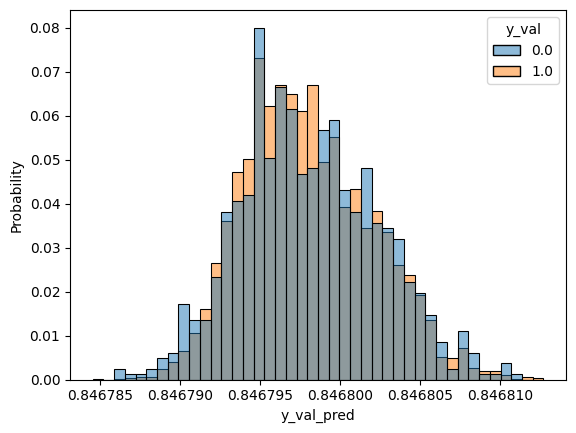

---------------------------------------------
Epoch: 11 | Time: 6m 38s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43084: 100%|██████████| 41/41 [00:20<00:00,  2.04it/s]


First 5 examples:
[1. 0. 0. 1. 0.] [0.84779978 0.8477993  0.84779942 0.84779847 0.84779847]
Lengths 5248 5248


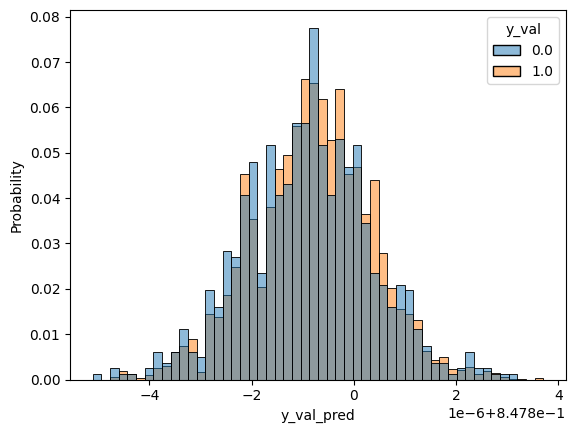

---------------------------------------------
Epoch: 12 | Time: 6m 45s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43085: 100%|██████████| 41/41 [00:20<00:00,  2.04it/s]

First 5 examples:
[1. 0. 0. 1. 0.] [0.84808302 0.84808278 0.84808314 0.8480832  0.84808254]
Lengths 5248 5248


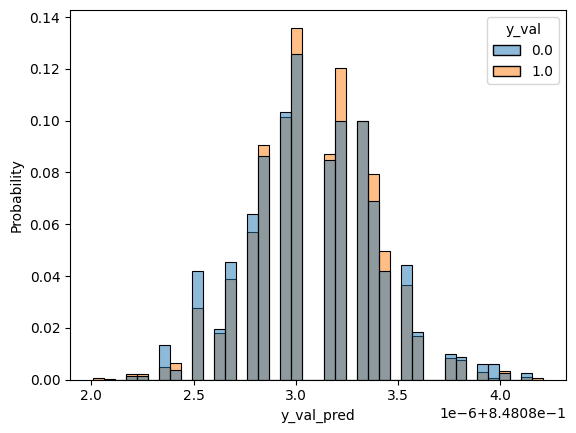

---------------------------------------------
Epoch: 13 | Time: 6m 49s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43085: 100%|██████████| 41/41 [00:20<00:00,  2.02it/s]


First 5 examples:
[1. 0. 0. 1. 0.] [0.84812379 0.84812379 0.84812379 0.84812385 0.84812379]
Lengths 5248 5248


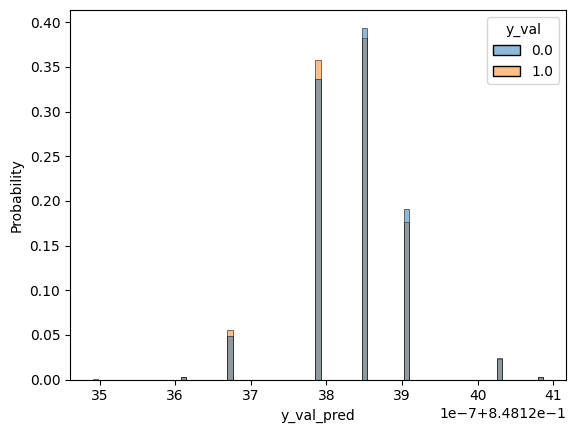

---------------------------------------------
Epoch: 14 | Time: 6m 49s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (validation) 0.43085: 100%|██████████| 41/41 [00:21<00:00,  1.94it/s]

First 5 examples:
[1. 0. 0. 1. 0.] [0.84808713 0.84808713 0.84808713 0.84808713 0.84808725]
Lengths 5248 5248


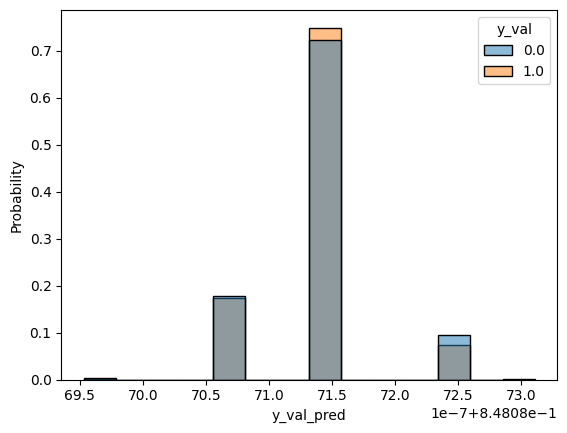

---------------------------------------------
Epoch: 15 | Time: 6m 52s
	Train Loss: 0.427
	 Val. Loss: 0.431
	 Best Val. Loss: 0.431
---------------------------------------------


Within epoch loss (training) 0.43143:  36%|███▌      | 75/207 [02:27<04:19,  1.97s/it]


KeyboardInterrupt: 

In [6]:
import os
import re
import yaml

# make sure we're in the correct directory
os.chdir('/Users/davidharar/Documents/School/thesis/downstream_classification')

# import trainer
from executors.train_on_local_machine_mps import trainer

# import yaml file. Later, loop over configs
config_file_name = 'tests/0.1.DM-batch-size-128-flipped-labels.yml'

with open('./configs/'+config_file_name,'r') as f:
    config = yaml.safe_load(f)['config']

experiment_ind = re.findall(r'\d+', config_file_name)
print(len(f'* Experiment {experiment_ind} *')*'*')
print(f'* Experiment {experiment_ind} *')
print(len(f'* Experiment {experiment_ind} *')*'*')
print('Configurations:')
print(config)
print('')
# run
print('Starting Experiment')
trainer(**config)


# Balance with random oversampler

## Saving Data

In [2]:
import pandas as pd
metadata_sample = pd.read_csv('./data/combined_data/metadata_sample_for_testing.csv',index_col=0)
metadata_sample_train = metadata_sample[metadata_sample['sample'] == 'train']
metadata_sample_not_train = metadata_sample[metadata_sample['sample'] != 'train']

metadata_sample_train_0 = metadata_sample_train[metadata_sample_train['DM'] == 0].reset_index(drop=True)
metadata_sample_train_1 = metadata_sample_train[metadata_sample_train['DM'] == 1].reset_index(drop=True)

N0 = len(metadata_sample_train_0)
N1 = len(metadata_sample_train_1)

N = max(N0,N1)

metadata_sample_train_1_oversampled = metadata_sample_train_1.sample(n = N, replace=True)
metadata_sample_train_1.shape, '-->', metadata_sample_train_1_oversampled.shape

metadata_sample_train_balanced = pd.concat([metadata_sample_train_0, metadata_sample_train_1_oversampled], axis=0, ignore_index=True)
print("oversampled DM distribution")
display(metadata_sample_train_balanced['DM'].value_counts())

metadata_sample_for_testing_balanced_by_DM = pd.concat([metadata_sample_train_balanced, metadata_sample_not_train], axis=0, ignore_index=True)

display(
    pd.crosstab(
        metadata_sample_for_testing_balanced_by_DM['sample'],
        metadata_sample_for_testing_balanced_by_DM['DM']
    )
)

metadata_sample_for_testing_balanced_by_DM.sample(frac=1).reset_index(drop=True).to_csv('./data/combined_data/metadata_sample_for_testing_balanced_by_DM.csv')


oversampled DM distribution


DM
0.0    22500
1.0    22500
Name: count, dtype: int64

DM,0.0,1.0
sample,,
test,4955,811
train,22500,22500
validation,4509,821


## Training

/opt/homebrew/Caskroom/miniforge/base/envs/torch-gpu/lib/python3.8/site-packages/torch/nn/modules/transformer.py:218: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because  self.layers[0].self_attn.batch_first was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


********************************
* Experiment ['0', '1', '128'] *
********************************
Configurations:
{'seed': 123, 'metadata_file_path': './data/combined_data/metadata_sample_for_testing_balanced_by_DM.csv', 'data_folder_path': './data/individual-signals/', 'fillna': 0, 'batch_size': 128, 'n_epochs': 30, 'targets': ['DM'], 'input_dimension': 12, 'hidden_dimmension': 32, 'attention_heads': 4, 'encoder_number_of_layers': 4, 'dropout': 0.4, 'clip': 1, 'positional_encodings': False, 'saving_path': './models/exp1'}

Starting Experiment


training using device: mps


32 4
The model has 160,584 trainable parameters
TransformerEncoderDownstream(
  (project_input): Linear(in_features=12, out_features=32, bias=True)
  (encoder): Linear(in_features=12, out_features=32, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.4, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
       

Within epoch loss (validation) 0.68843: 100%|██████████| 41/41 [00:20<00:00,  2.03it/s]

First 5 examples:
[0. 1. 0. 0. 0.] [0.49661866 0.49664187 0.49657595 0.49655315 0.49659073]
Lengths 5248 5248


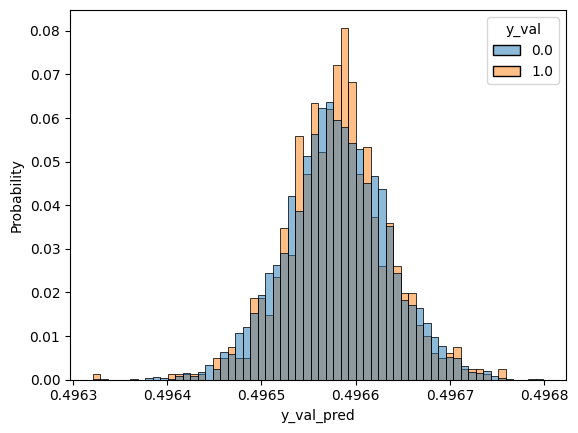

---------------------------------------------
Epoch: 01 | Time: 11m 23s
	Train Loss: 0.697
	 Val. Loss: 0.688
	 Best Val. Loss: 0.688
---------------------------------------------


Within epoch loss (training) 0.69307:  19%|█▉        | 67/351 [02:10<09:11,  1.94s/it]


KeyboardInterrupt: 

In [3]:
import os
import re
import yaml

# make sure we're in the correct directory
os.chdir('/Users/davidharar/Documents/School/thesis/downstream_classification')

# import trainer
from executors.train_on_local_machine_mps import trainer

# import yaml file. Later, loop over configs
config_file_name = 'tests/0.1.DM-batch-size-128-balanced-train.yml'

with open('./configs/'+config_file_name,'r') as f:
    config = yaml.safe_load(f)['config']

experiment_ind = re.findall(r'\d+', config_file_name)
print(len(f'* Experiment {experiment_ind} *')*'*')
print(f'* Experiment {experiment_ind} *')
print(len(f'* Experiment {experiment_ind} *')*'*')
print('Configurations:')
print(config)
print('')
# run
print('Starting Experiment')
trainer(**config)


In [4]:
os.getcwd()

'/Users/davidharar/Documents/School/thesis/downstream_classification'

In [1]:
import os
os.chdir('/Users/davidharar/Documents/School/thesis/downstream_classification')
from dataloader.DataLoader import *
train_generator = DataGenerator(
    metadata_file_path= './data/combined_data/metadata_sample_for_testing_balanced_by_DM.csv',   # path to metadata file
    data_folder_path = './data/individual-signals/',     # path to individual signals
    sample='train',               # sample we want to create a generator to. Either train, validation or test
    targets=['DM'],             # list of targets we want train on
    batch_size=128,           # batch size
    shuffle=True       # Whether to shuffle the list of IDs at the end of each epoch.
                 )

X,y = train_generator.__getitem__(175)
print(np.array(X).shape, np.array(y).shape)
X,y


(128, 12, 450) (128, 1, 1)


(array([[[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [0.67038019, 0.68417719, 0.70763658, ..., 0.78433402,
          0.77619655, 0.77312226],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [0.21102752, 0.21220886, 0.21369197, ..., 0.28780546,
          0.28732625, 0.28646085],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan]],
 
        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [0.20501789, 0.22070848, 0.22842473, ..., 0.59333081,
          0.40024916, 0.22256653],
         [0.35112462, 0.34935102, 0.35577543, ..., 0.43746166,
          0.30820414, 0.19622473],
         ...,
         [0.6042504 , 0.60953294, 0.6118839 , ..., 0.61478501,
          0.69066829, 0.

In [2]:
X_174,y_174 = train_generator.__getitem__(174)
print(np.array(X_174).shape, np.array(y_174).shape)
X,y = train_generator.__getitem__(175)
print(X.shape, y.shape)


(128, 450) (128, 1)
(128, 450) (128, 1)


In [14]:
# [_.shape for _ in y]
np.expand_dims(y[-1],-1).shape

(1, 1)

In [10]:
y_174[-10:]

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]])]

In [11]:
len(y)

128

In [13]:
np.array(X).shape

(128, 12, 450)

In [15]:
np.array(X_174).shape


(128, 12, 450)

In [4]:
import numpy as np
indices = np.arange(5)
np.random.shuffle(indices)
indices

array([2, 4, 1, 0, 3])